# Comparing the first and second waves of COVID-19 in Italy through Python Pandas

In this tutorial I implement the code to compare some measurements related to the first and second waves in Italy. In [my previous post](), I dealt with the ratio between the number of total cases and number of swabs.
In this post, I consider the following types of measurements:
* number of deaths
* number of patients admitted to the intensive care
* number of number of hospitalized.
I exploit the Python `pandas` library. The code is very simple and reusable thus it can be easily adapted to data related to other Countries.

Every measurement is analysed from two perspectives:
* cumulative measure - the measure related to a given day is the sum of all the measurements of the previous days plus the measurement of the current day.
* daily measure - the measure related to a given day is given only by the measurement of the previous day.

In addition, for each measurement, I provide the code to compare data related to the first wave with data related to the second wave. I set the 2020, July 31st as the splitting date between the first and second wave.

## Import data
Firstly, I import data from the [Github repository](https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv) of the Italian Protezione Civile. Data are updated daily. I read the csv file through the `read_csv()` function and I use the `set_index()` function to set the date as the index of the dataframe. This operation converts the dataframe into a time series. Then, I use the `tail(10)` function to show the last 10 rows of the time series.

In [3]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv") 
df.set_index('data', inplace=True)
df.tail(10)

,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi
data,,,,,,,,,,,,,,,,,,,
2020-12-10T17:00:00,ITA,29088,3291,32379,664148,696527,-13988,16999,1027994,62626,NaN,NaN,1787147,23676174,13744859.0,NaN,251.0,NaN,NaN
2020-12-11T17:00:00,ITA,28562,3265,31827,658496,690323,-6204,18727,1052163,63387,NaN,NaN,1805873,23866590,13823013.0,NaN,208.0,NaN,NaN
2020-12-12T17:00:00,ITA,28066,3199,31265,653583,684848,-5475,19903,1076891,64036,NaN,NaN,1825775,24063029,13901576.0,NaN,195.0,NaN,NaN
2020-12-13T17:00:00,ITA,27735,3158,30893,655138,686031,1183,17938,1093161,64520,NaN,NaN,1843712,24215726,13971600.0,NaN,152.0,NaN,NaN
2020-12-14T17:00:00,ITA,27765,3095,30860,644249,675109,-10922,12030,1115617,65011,NaN,NaN,1855737,24319310,14022752.0,NaN,138.0,NaN,NaN
2020-12-15T17:00:00,ITA,27342,3003,30345,632968,663313,-11796,14844,1141406,65857,NaN,NaN,1870576,24483741,14086989.0,NaN,199.0,NaN,NaN
2020-12-16T17:00:00,ITA,26897,2926,29823,615883,645706,-17607,17572,1175901,66537,NaN,NaN,1888144,24683230,14165961.0,NaN,191.0,NaN,NaN
2020-12-17T17:00:00,ITA,26427,2855,29282,606061,635343,-10363,18236,1203814,67220,NaN,NaN,1906377,24635720,14246739.0,NaN,183.0,NaN,NaN
2020-12-18T17:00:00,ITA,25769,2819,28588,599210,627798,-7545,17992,1226086,67894,NaN,NaN,1921778,24815520,14150088.0,NaN,189.0,NaN,NaN


## Cumulative measure
I define a generic function, called `plot_measure()` which plots a measure passed as parameter. This function exploits the `matplotblib` library to plot the measure.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_measure(measure):
    x_labels = []
    dates = measure.index.tolist()

    i = 0
    step = 5
    while i < len(measure):
        x_labels.append(dates[i])
        i += step

    plt.figure(figsize=(25,10))
    plt.grid()

    plt.plot(measure)
    plt.xlim(dates[0],dates[len(dates)-1])

    plt.xticks(x_labels,rotation=90)
    plt.show()

Now I can use the defined function to plot the cumulative number of patients admitted to intensive care (column `terapia_intensiva`). 

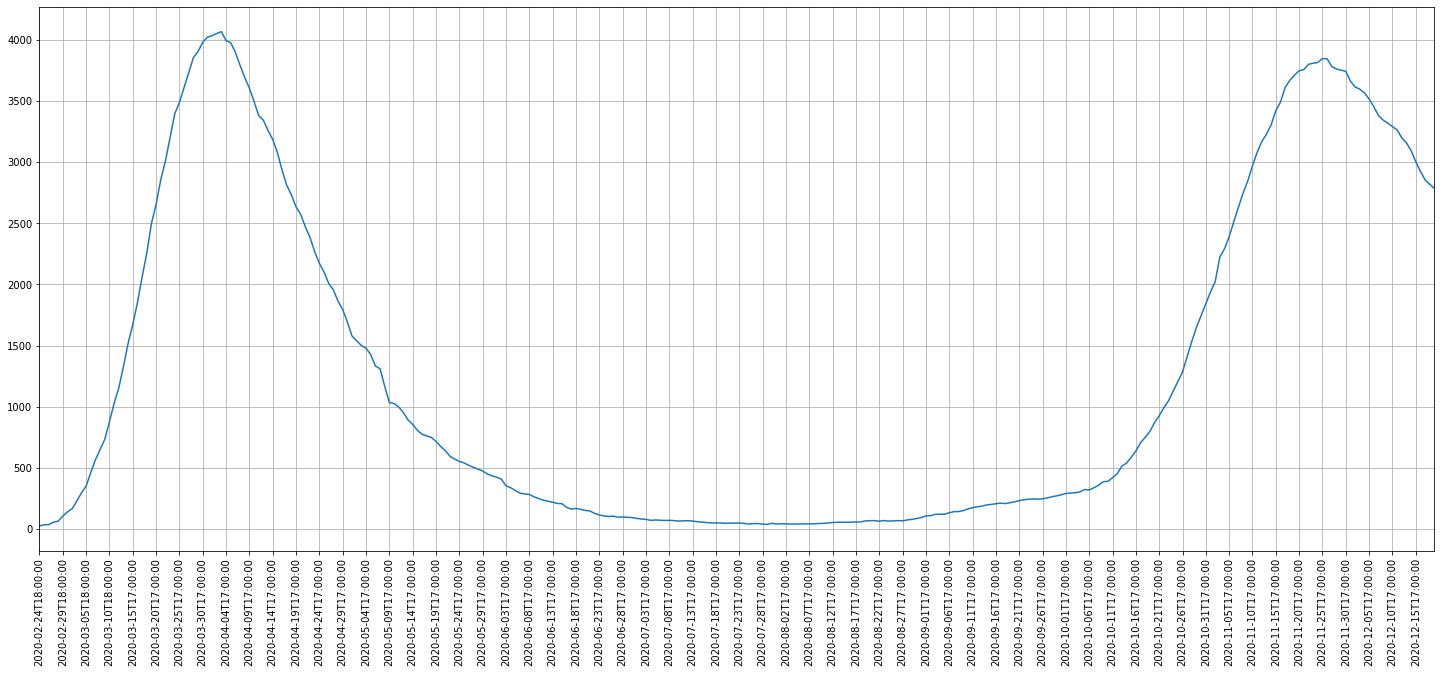

In [5]:
plot_measure(df['terapia_intensiva'])

The same function can be used also to plot all the other columns of the dataframe, such as the total number of hospitalized patients and deaths.

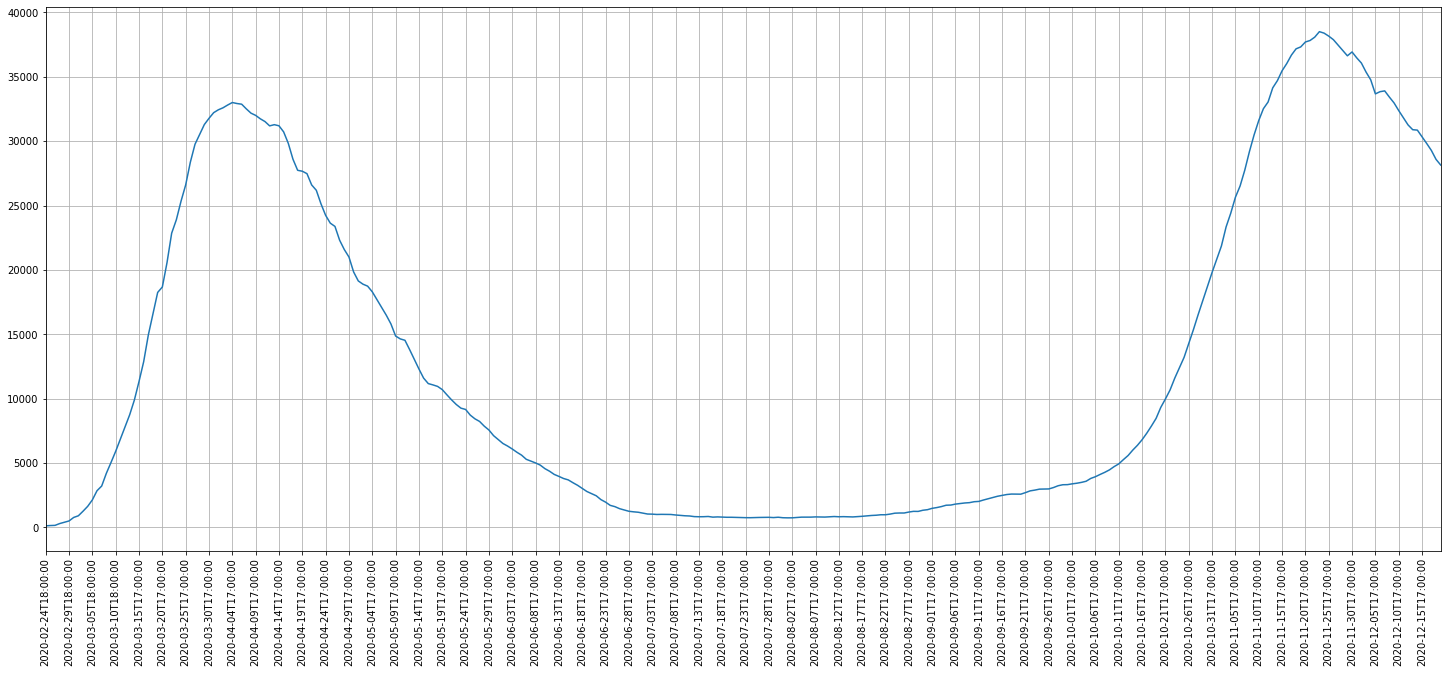

In [83]:
plot_measure(df['totale_ospedalizzati'])

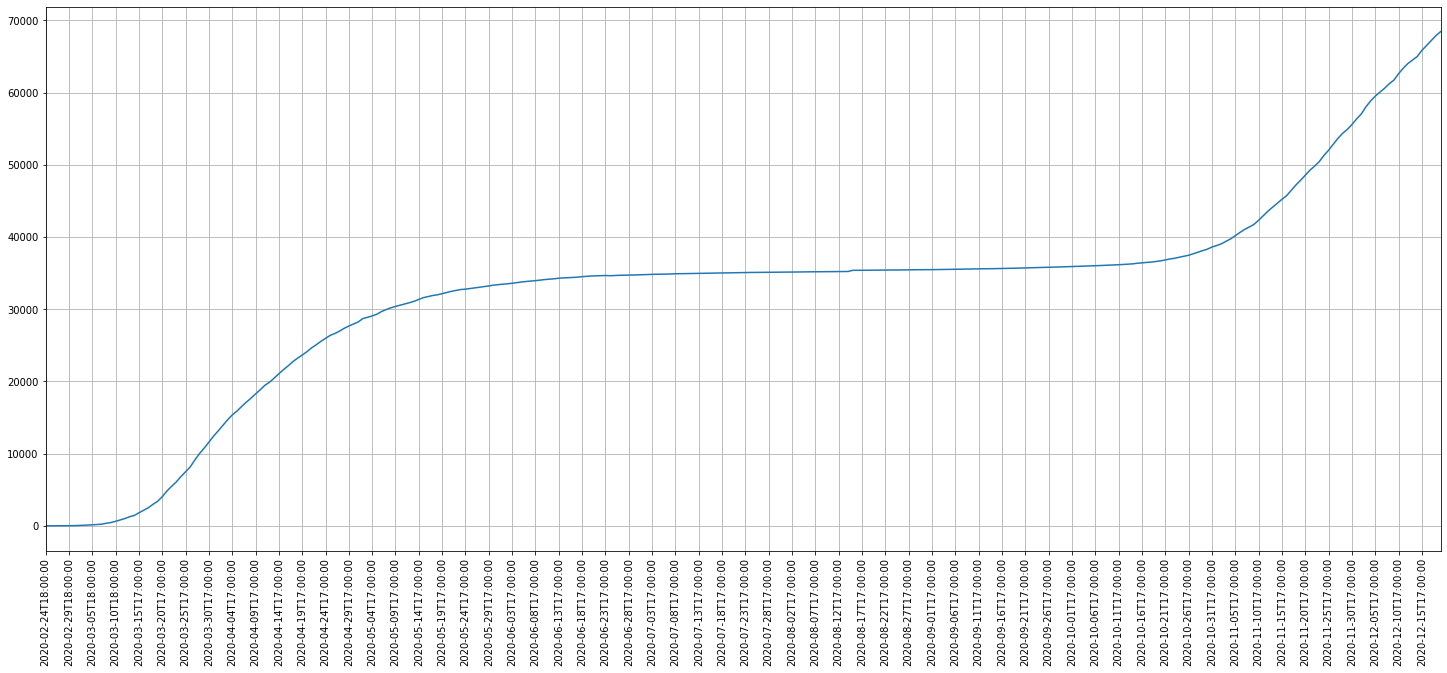

In [214]:
plot_measure(df['deceduti'])

Now I define a function, called `plot_measures()` which plots two measures, one related to the first wave and the other related to the second wave. The function is very simple and takes the two measures as input.

In [79]:
def plot_measures(measure1, measure2):
    
    plt.figure(figsize=(25,10))
    plt.grid()

    plt.plot(measure1, label='first wave')
    plt.plot(measure2, label='second wave')
    
    plt.legend()
    plt.show()

In order to split a measure in the two waves, I define a function called `overlap()` which receives the measure as input, as well as the range of values between `min_value` and `max_value`, within the starting date of each wave must be identified. In practice, I'd like that the two waves start when the values of the considered measure fall in the same range of values. For example, for the column `terapia_intensiva` I'd like that the beginning date of the two waves falls in the interval [400,500]. Then, I create two series, one for each wave and I plot the result.

In [215]:
def overlap(measure, min_value, max_value):
    fw_date = measure.where((measure > min_value) & (measure < max_value) ).dropna().index.tolist()[0]
    
    fw_end_date = '2020-07-31T17:00:00'
    sw_date = measure[fw_end_date:].where((measure > min_value) & (measure < max_value) ).dropna().index.tolist()[0]
    
    
    fw_df = measure[fw_date:fw_end_date]
    
    sw_df = measure[sw_date:]
    
    fw_index = np.arange(0, len(fw_df))
    sw_index = np.arange(0, len(sw_df))
    fw_ts = pd.Series(fw_df.values,index=fw_index)
    sw_ts = pd.Series(sw_df.values,index=sw_index)
    plot_measures(fw_ts, sw_ts)
    
    

Now I can apply the function `overlap()` to the column `terapia_intensiva`

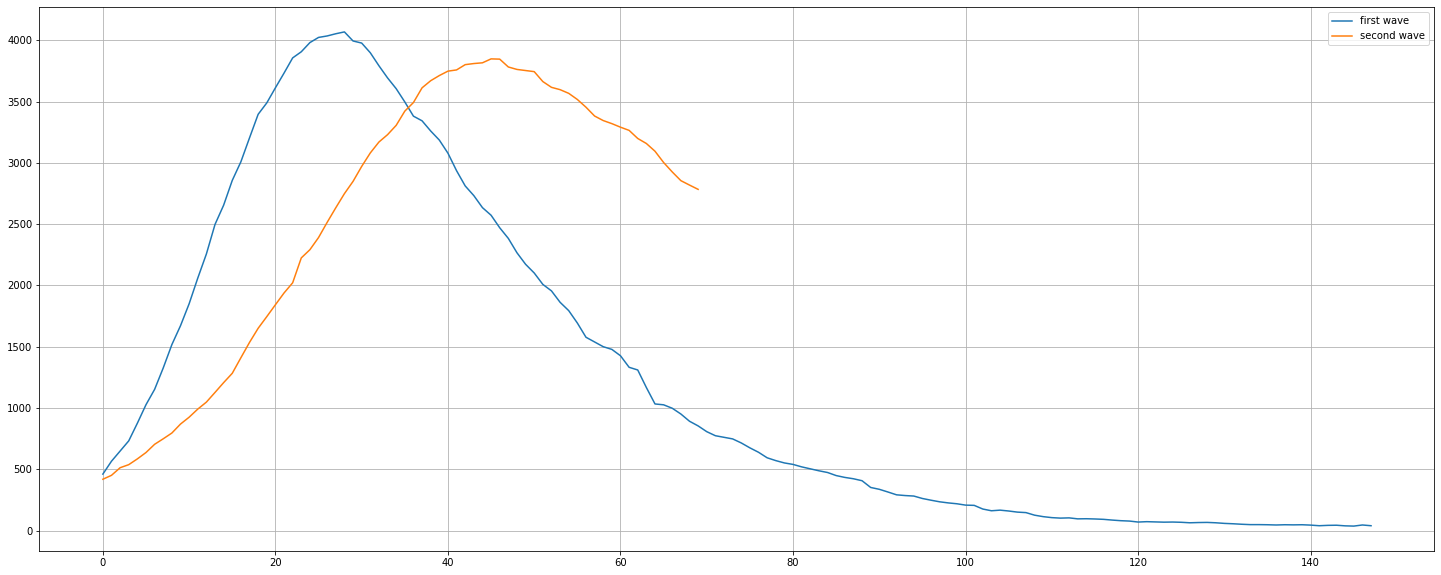

In [206]:
overlap(df['terapia_intensiva'], 400, 550)

and the column `totale_ospedalizzati`

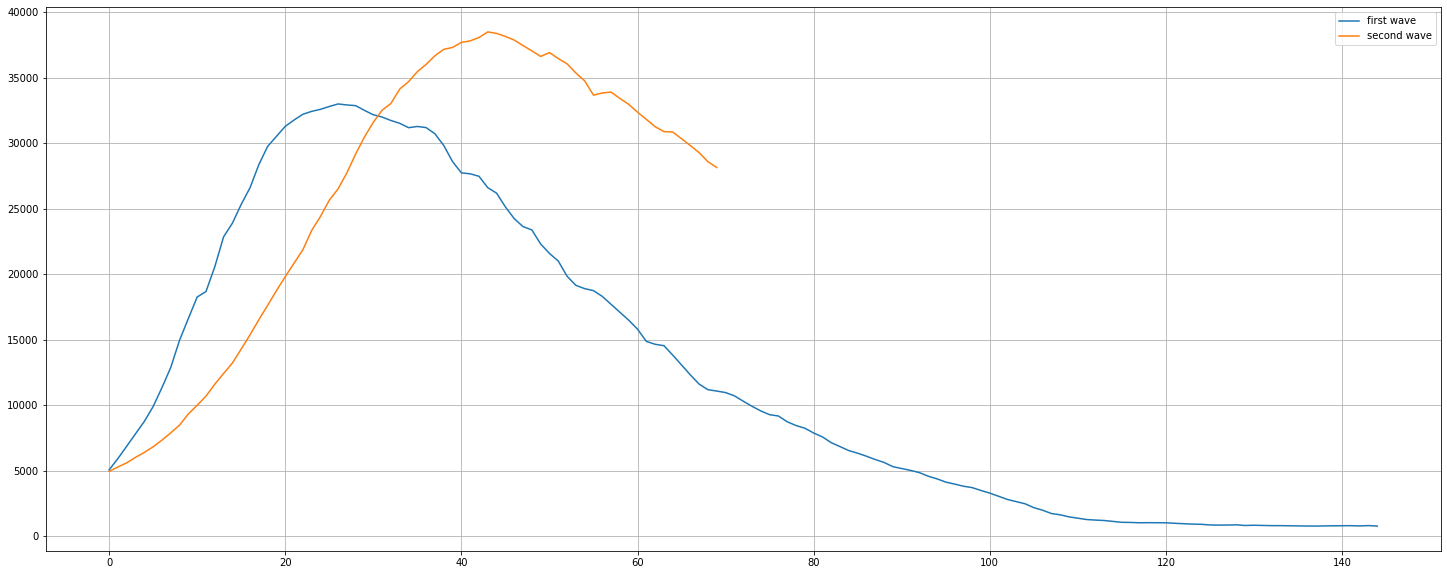

In [202]:
overlap(df['totale_ospedalizzati'], 4900, 5100)

## Daily measure
In this case, I define a function called `daily_measure()`, which calculates the value of the measure related to a given day as the difference between the current value for that day and the value for the previous day. Then the fucntion returns a `Series()` with the obtained value.

In [217]:
def daily_measure(m):
    d_measure = []
    for i in range(1, len(m)):
        d_measure.append(m[i] - m[i-1])
    return pd.Series(d_measure, index=m.index[1:])

I can apply the described function to plot the column `terapia_intensiva`

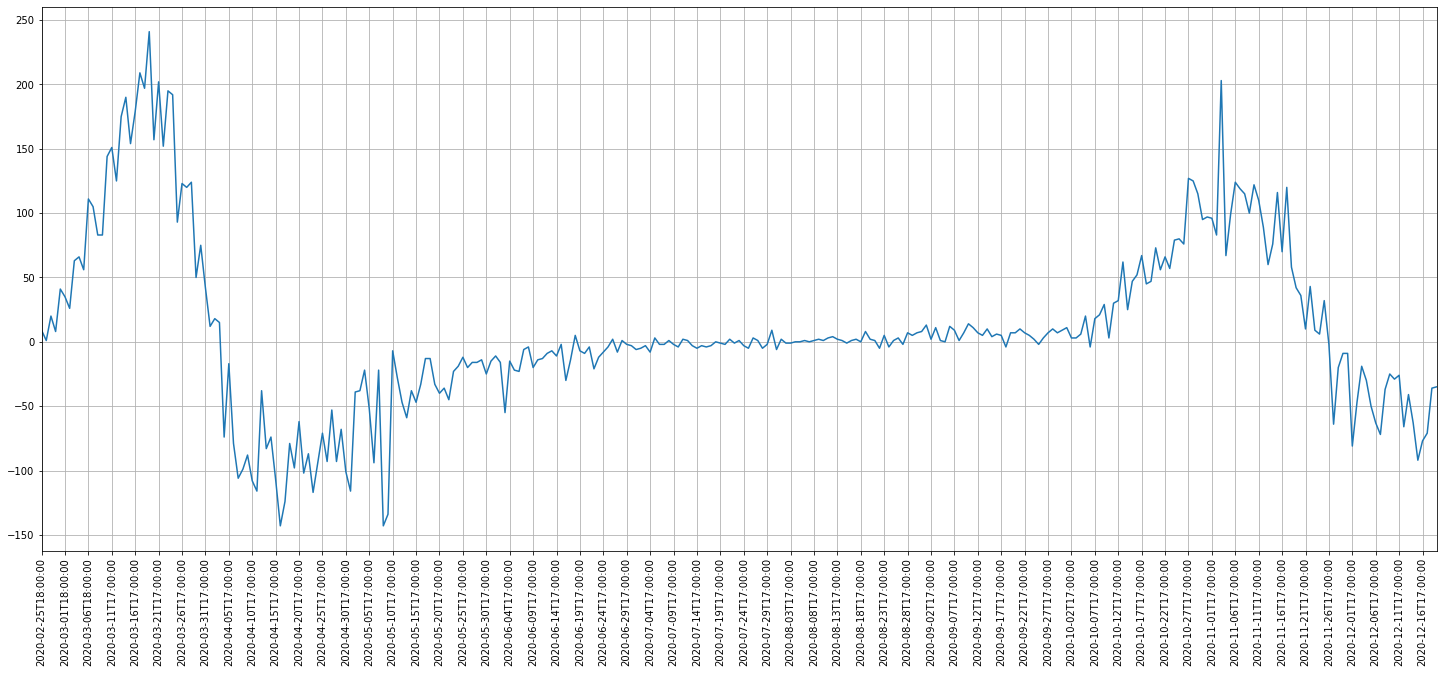

In [218]:
plot_measure(daily_measure(df['terapia_intensiva']))

or I can apply the `overlap()` function to the `daily_measure()` related to the column `terapia_intensiva`.

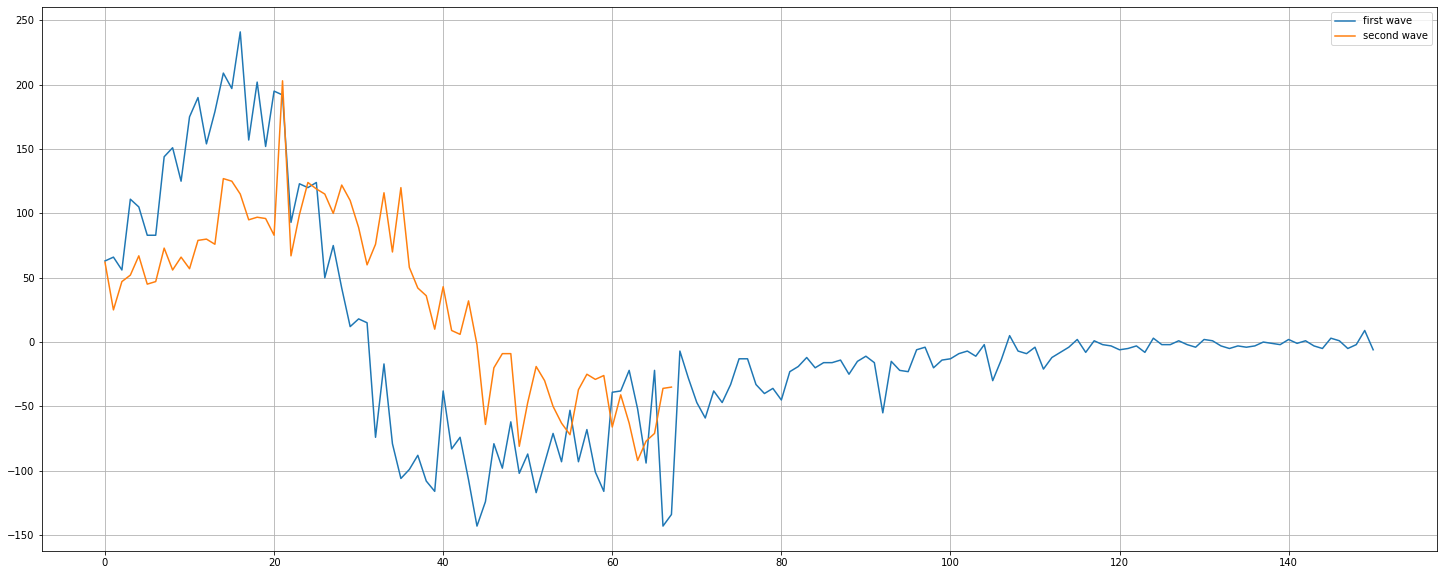

In [212]:
overlap(daily_measure(df['terapia_intensiva']),50,80)

The same analysis can be done for the number of deaths.

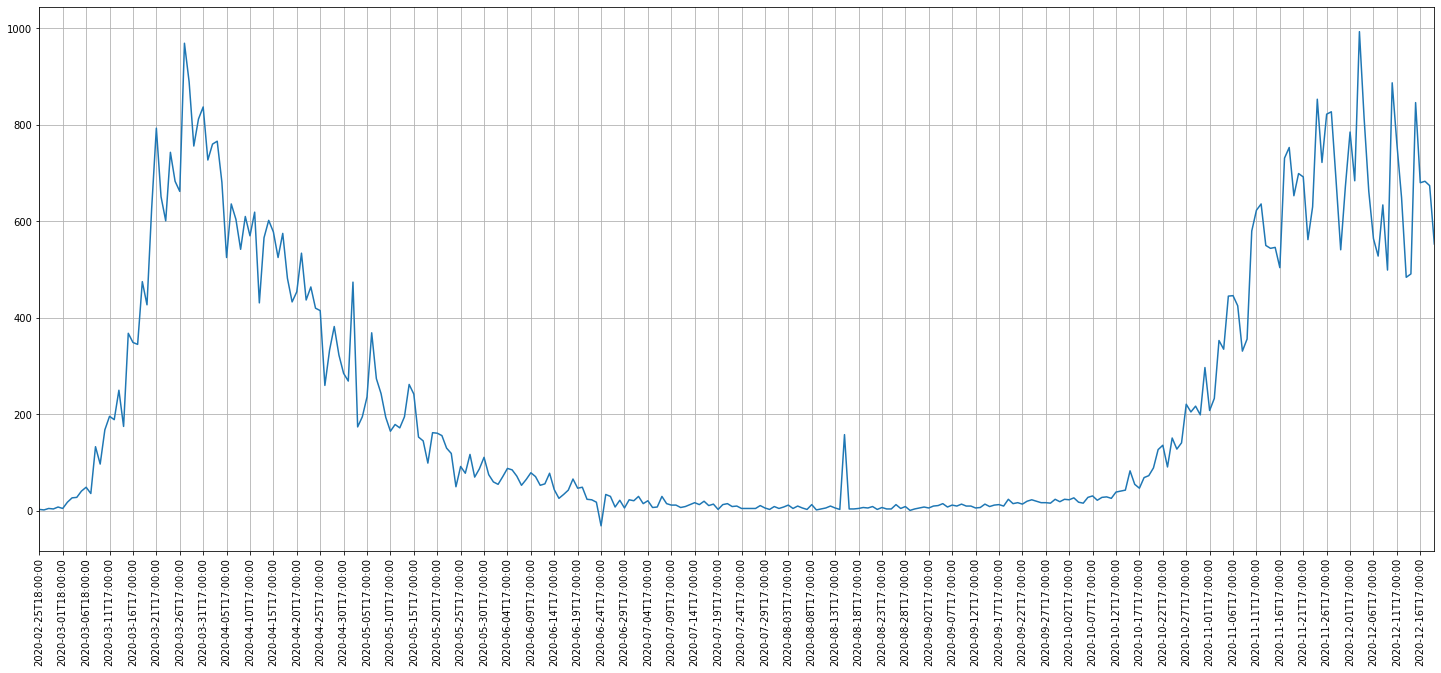

In [219]:
plot_measure(daily_measure(df['deceduti']))

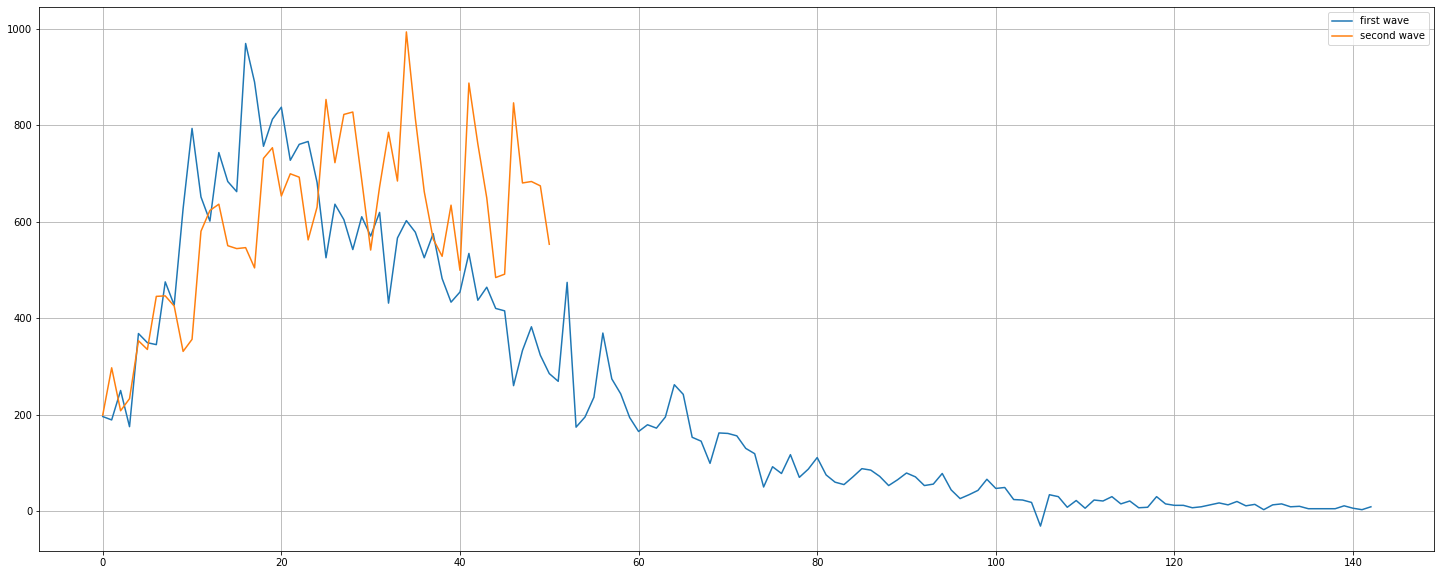

In [222]:
overlap(daily_measure(df['deceduti']),180,200)